### Exercice 1 : Approche Probabiliste Générative : Näive Bayes

In [47]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import time
# 1)
file_path = 'spam.csv'
donnes=pd.read_csv(file_path,encoding='latin-1')
#donnes.head()

In [48]:
# 2) 
donnes=donnes.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [49]:
# on renomme les noms colonnes pour la lisibilités
donnes=donnes.rename(columns={"v1":"Spam_Ham","v2":"sms_corps"})
donnes.head()

,Spam_Ham,sms_corps
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
#On verifie si il y a des données manquantes, ici je me suis rendu compte que c'est pas le cas
#donnes=donnes.dropna(axis=1)
#donnes

In [51]:
# On a besoin de valeurs numériques pour entrainer notre modèle ducoup on va catégoriser spam a 1 et 0 sinon
donnes['estSpam']=[0 if x=='ham' else 1 for x in donnes['Spam_Ham']]

In [52]:
# On va vectoriser notre texte
vectoriseur= CountVectorizer()
X=vectoriseur.fit_transform(donnes["sms_corps"])
#Cible
y=donnes['estSpam']

# 3)
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)


In [53]:
# 4)
#Création du modèle 
bayes=GaussianNB()

start_time = time.time()

bayes.fit(X_train.toarray(),y_train)
pred=bayes.predict(X_test.toarray())

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")
# 5) 

print("Précision",metrics.precision_score(y_test, pred))
print("Rappel",metrics.recall_score(y_test,pred))
print("F1 Score",metrics.f1_score(y_test, pred,))


Execution Time: 2.7806 seconds
Précision 0.6166666666666667
Rappel 0.891566265060241
F1 Score 0.729064039408867


##### 5)
###### TP = Nombre de Vrai positif
###### FP = Nombre de Faux positif
###### FN = Nombre de Faux Négatif
$\text{Précision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$

$\text{Rappel} = \frac{\text{TP}}{\text{TP} + \text{FN}}$



$F_1 = 2 \cdot \frac{\text{Précision} \cdot \text{Rappel}}{\text{Précision} + \text{Rappel}}$


#### Autres méthodes qu'on aurait pu utiliser:
- classification_report : pour avoir un apercu globale
- confusion_matrix : avoir les details des erreurs avec une matrice de confusion

##### 6)
-  Un modèle génératif permet d'avoir la confiance d'une prédiction et d'avoir un rejet d'une prédiction qu'on peut pas avoir un modèle discriminatif
-  On peut classifier P(Y|X)
-  On peut générer de nouvelles données si on connait P(X|Y)
-  Efficace sur des petits jeux de données

### Exercice 2: Classification avec Complement Naive Bayes

In [54]:
# 1)et 2) Déja fait dans les étapes précédentes

# 3) Création du modèle 
complement_naives_bayes= ComplementNB()

start_time = time.time()

complement_naives_bayes.fit(X_train,y_train)
pred2=complement_naives_bayes.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")
# 4) 

print("Précision",metrics.precision_score(y_test, pred2))
print("Rappel",metrics.recall_score(y_test,pred2))
print("F1 Score",metrics.f1_score(y_test, pred2,))


Execution Time: 0.0159 seconds
Précision 0.8548387096774194
Rappel 0.9578313253012049
F1 Score 0.9034090909090909


In [55]:
# 5)  Matrice de confusion
matrice_confusion=metrics.confusion_matrix(y_true=y_test,y_pred=pred)
print(matrice_confusion)

[[857  92]
 [ 18 148]]


6) Nous avons:
    - 857 Vrai Negatif (TN)
    - 92 Faux Negatif (FN)
    - 18 Faux Postif (FP)
    - 148 True Postif (TP)
Ainsi on a 110 erreurs FN+FP
ett 857+148 = 1005 Bonne prédictions TN + TP

### Exercice 3 : Approche Probabiliste Discriminante : Régression Logistique

In [56]:
# 1) et 2) et 3) déja fait
# 4)
regression_logistique = LogisticRegression()
start_time = time.time()


regression_logistique.fit(X_train,y_train)
pred3=regression_logistique.predict(X_test)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time:.4f} seconds")

# 4) 

print("Précision",metrics.precision_score(y_test, pred3))
print("Rappel",metrics.recall_score(y_test,pred3))
print("F1 Score",metrics.f1_score(y_test, pred3,))


Execution Time: 0.1426 seconds
Précision 0.9861111111111112
Rappel 0.8554216867469879
F1 Score 0.9161290322580645


#### 6)
-  On modèlise P(Y|X) directement.
-  Utile seulement pour les taches de classification
-  Utile pour de grandes jeux de données et de relations complexes

In [57]:
### Exercice 4 : Comparaison des Performances

In [58]:
# 1)
report_NB=metrics.classification_report(y_test,pred)
report_CNB=metrics.classification_report(y_test,pred2)
report_RL=metrics.classification_report(y_test,pred3)
print("############# Naïve Bayes #########################")
print(report_NB)
print("############# Complement Naïve Bayes #########################")
print(report_CNB)
print("############# Regression Logistique #########################")
print(report_RL)

############# Naïve Bayes #########################
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       949
           1       0.62      0.89      0.73       166

    accuracy                           0.90      1115
   macro avg       0.80      0.90      0.83      1115
weighted avg       0.93      0.90      0.91      1115

############# Complement Naïve Bayes #########################
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       949
           1       0.85      0.96      0.90       166

    accuracy                           0.97      1115
   macro avg       0.92      0.96      0.94      1115
weighted avg       0.97      0.97      0.97      1115

############# Regression Logistique #########################
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.86      0.92       166

    a

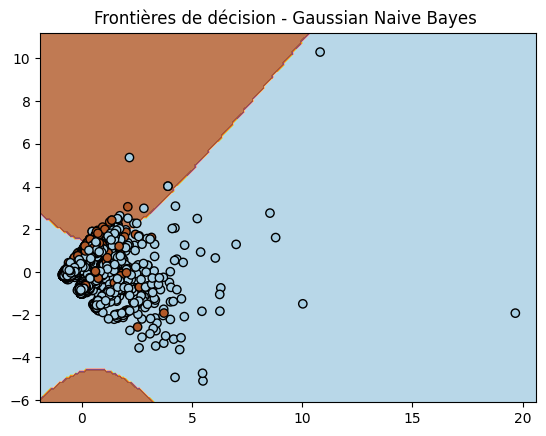

In [59]:
# 2)
# Gaussian Naïve Bayes 
# Réduction à 2 dimensions
pca = PCA(n_components=2)
train_2D = pca.fit_transform(X_train.toarray())

test_2D = pca.transform(X_test.toarray())

# Création d'une grille pour les frontières
x_min, x_max = train_2D[:, 0].min() - 1, train_2D[:, 0].max() + 1
y_min, y_max = train_2D[:, 1].min() - 1, train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Frontières pour Gaussian Naïve Bayes
model = GaussianNB()
model.fit(train_2D, y_train)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(train_2D[:, 0], train_2D[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Frontières de décision - Gaussian Naive Bayes ")
plt.show()


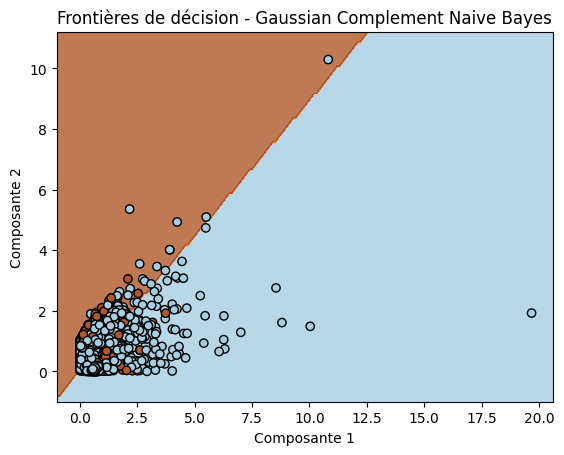

In [60]:
# 2)
# Complement Gaussian Naïve Bayes 
# Réduction à 2 dimensions
pca = PCA(n_components=2)
train_2D = np.abs(pca.fit_transform(X_train.toarray()))
test_2D = np.abs(pca.transform(X_test.toarray()))

# Création d'une grille pour les frontières
x_min, x_max = train_2D[:, 0].min() - 1, train_2D[:, 0].max() + 1
y_min, y_max = train_2D[:, 1].min() - 1, train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Frontières pour Complement Gaussian Naïve Bayes
model = ComplementNB()
model.fit(train_2D, y_train)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(train_2D[:, 0], train_2D[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Frontières de décision - Gaussian Complement Naive Bayes")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.show()

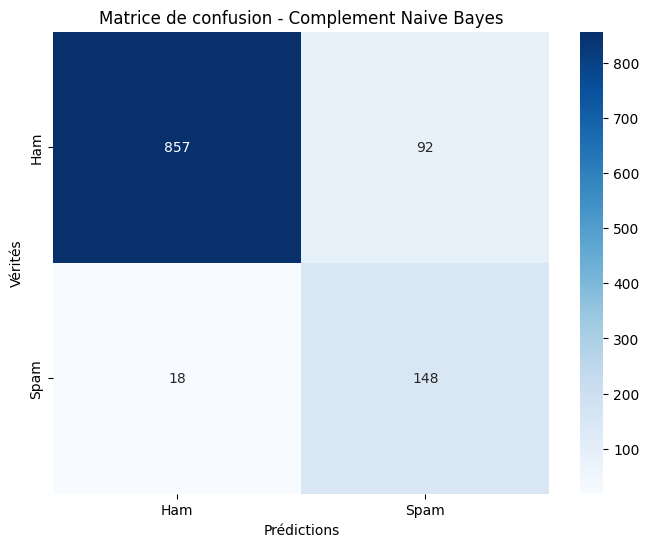

In [61]:
# Réduction à 2 dimensions impossible pour Complement naive bayes car utilisation de TF-IDF (chaque mot a plusieurs dimensions)
# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.title("Matrice de confusion - Complement Naive Bayes")
plt.show()


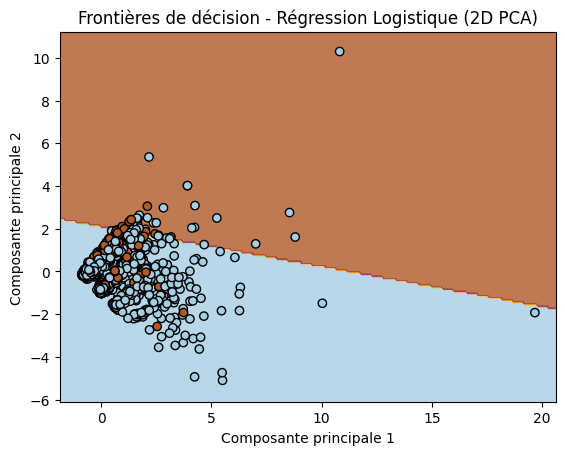

In [62]:
# Regression logistique
# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
train_2D = pca.fit_transform(X_train.toarray())
test_2D = pca.transform(X_test.toarray())

# Création d'une grille pour les frontières
x_min, x_max = train_2D[:, 0].min() - 1, train_2D[:, 0].max() + 1
y_min, y_max = train_2D[:, 1].min() - 1, train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Entraînement de la régression logistique sur les données réduites
model_lr = LogisticRegression()
model_lr.fit(train_2D, y_train)

# Prédictions sur la grille
Z = model_lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracé des frontières de décision
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(train_2D[:, 0], train_2D[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Frontières de décision - Régression Logistique (2D PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()


##### 3)
##### model Naïve Bayes :
Précision 0.8548387096774194           
Rappel 0.9578313253012049          
F1 Score 0.9034090909090909
          
##### model Complement Naîve Bayes:
Précision 0.8548387096774194          
Rappel 0.9578313253012049          
F1 Score 0.9034090909090909          


##### model Regréssion Logistique
Précision 0.9861111111111112          
Rappel 0.8554216867469879          
F1 Score 0.9161290322580645          
          
En terme de précision, notre modèle de régression logistique semble être le meilleur          
En terme de Rappel, notre modèle Naïve Bayes et Complement Naïve Bayes semblent être les meilleurs(meme rappel).         
En terme de F1, La regression logistique semble être le meilleur          

##### 4)


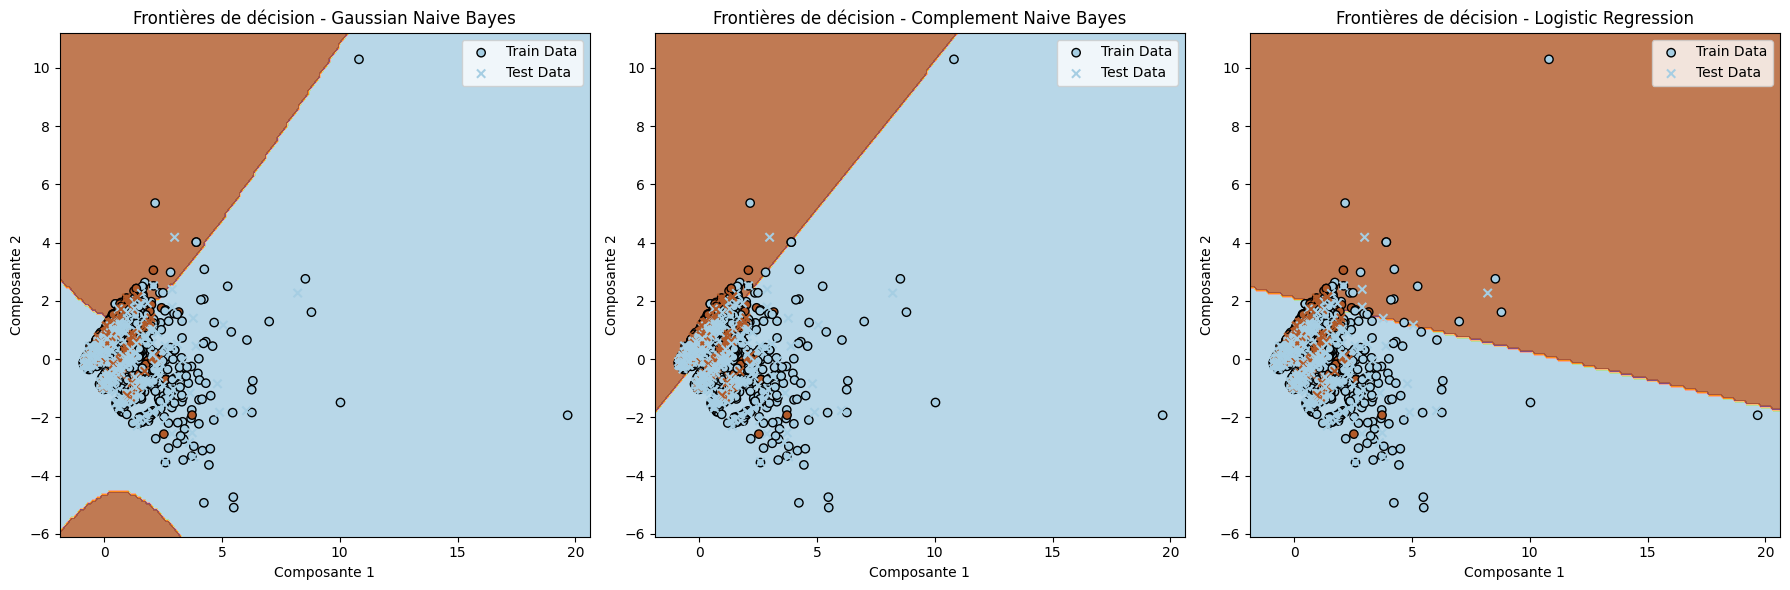

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Assurez-vous que X_train, X_test, y_train, y_test sont définis et vectorisés

# Réduction des dimensions à 2D avec PCA pour la visualisation
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train.toarray())
X_test_2D = pca.transform(X_test.toarray())

# Ajuster Complement Naive Bayes à des données non négatives
X_train_2D_comp = X_train_2D.copy()
X_test_2D_comp = X_test_2D.copy()

if X_train_2D.min() < 0:
    X_train_2D_comp += abs(X_train_2D.min())
    X_test_2D_comp += abs(X_train_2D.min())

# Création d'une grille pour les prédictions
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Liste des modèles
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Initialisation de la figure
plt.figure(figsize=(18, 6))

# Tracer les frontières de décision pour chaque modèle
for i, (name, model) in enumerate(models.items()):
    if name == "Complement Naive Bayes":
        # Utiliser les données non négatives pour ComplementNB
        model.fit(X_train_2D_comp, y_train)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()] + abs(X_train_2D.min()))
    else:
        # Autres modèles
        model.fit(X_train_2D, y_train)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)

    # Création des sous-graphiques
    plt.subplot(1, len(models), i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired, label="Train Data")
    plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, marker='x', cmap=plt.cm.Paired, label="Test Data")
    plt.title(f"Frontières de décision - {name}")
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.legend()

plt.tight_layout()
plt.show()


### Discussion

### 1. Comparaison des différents modèles avec leurs avantages et inconvéniants:
##### Gaussian Naive Bayes :
##### Avantages : 
- Rapide pour entrainer
- Performant sur de petites données
-  On peut générer de nouvelles données si on connait P(X|Y)
##### Inconvéniants :
- Peu pertinent pour des données qui suivent pas de normalité (ici sms ne suit pas une loi normale )

##### Complement Naive Bayes :
##### Avantages : 
- Conçu pour des données désquilibrés
- On peut générer de nouvelles données si on connait P(X|Y)
##### Inconvéniants :
- Peu perforamant si les données sont pas bien normalalisées
- Ne supporte pas de valeurs négatives, transformation nécessaire

##### Régression Logistique :
##### Avantages : 
-  Utile seulement pour les taches de classification
-  Utile pour de grandes jeux de données et de relations complexes
-  On modèlise P(Y|X) directement.
-  Pertitent si les relations ne respectent pas les hypothèses de Bayes
##### Inconvéniants :
- Temps d'entrainement plus lent pour de grandes données ici rapide car petite taille de donnéesa
- Plus sujet au sur ajustement si les données sont pas prétraites ou fuite de données

### 2. Complexité :
d = données
| Modèle                   | Complexité d'entraînement                       | Complexité de prédiction |
|--------------------------|------------------------------------------------|--------------------------|
| Gaussian Naive Bayes     | O(nd) (linéaire)                               | O(d)                    |
| Complement Naive Bayes   | O(nd) (linéaire + vérification des valeurs non négatives) | O(d)                    |
| Régression Logistique    | O(ndk) (linéaire mais dépendant des itérations k) | O(d)                    |


##### Execution Time: 2.7806 seconds ( Gaussian Naive Bayes)
##### Execution Time: 0.0159 seconds ( Complement Naive Bayes)
##### Execution Time: 0.1426 seconds ( Regression Logistique)


### 3. Pertinence de chaque approche pour des problèmes de classification:
##### Gaussian Naive Bayes :
Données textuelles, problèmes simples
##### Complement Naive Bayes :
Données déséquilibrées, textuelles
##### Régression Logistique :
Données complexes ou bruitées, relations non linéaires
### 4. 
Naives Bayes est rapides mais limité car il simplifie les calculs avec les probabilités et il fait des hypothéses qui peuvent être faux, il est également sensible aux bruits
alors que la régréssion logistique plus lente car il utilise des méthodes complexes comme le méthode de descente de gradient pour ajuster les poids, mais il emet pas d'hypothése forte et ignore les caractéristiques inutiles grace a son système de pénalité ( la même qu'il utilise pour séparer les classes)


### 5.
Complement Naive Bayes est le plus adapté si les données est déséquilibré ou bruyant